### Clusterização K-means
Clusterização K-means é uma forma de machine learning não-supervisionado. Pode
ser utilizado para separar dados em grupos. Em processamento de imagens, o 
K-means pode ser utilizado para fazer compressão de imagem, agrupando um conjunto de pixels em uma imagem pela sua similaridade (neste exemplo em tonalidades de cinza), e assim reduzindo a quantidade de memória necessária para representar a imagem.<br>
O algoritimo K-means se inicia por definir de forma aleatória n pontos de dados para serem os centróides dos clusters, sendo n o número de clusters. Cada ponto de dados é associado ao cluster que tem o centróide mais próximo, e depois cada cluster tem o seu valor médio calculado e definido como novo centróide. Assim o algoritmo se repete até a convergência.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from scipy import ndimage
from sklearn import cluster


Resolução da imagem original: (512, 512)


 Figura 1


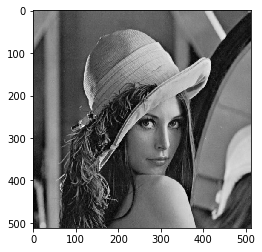

In [66]:
img = mpimg.imread('lenna.jpg') # read image from file to array
print('Resolução da imagem original:' ,img.shape)
imgplot = plt.imshow(img, cmap='gray')
print('\n\n Figura 1')
plt.show()

A imagem utilizada foi a lenna.jpg. Esta imagem tem 512 x 512 pixels
em 256 tons de cinza.

In [67]:
img.shape

(512, 512)

In [68]:
img2 = img.reshape(512*512,1)
img2.shape

(262144, 1)

### Executando o K-means na imagem
O número de clusters é definido com base na regra do negócio. Neste caso, o valor é definido de forma empírica pela melhor representação do resultado visual.

In [73]:
kmeans_cluster = cluster.KMeans(n_clusters=4)
kmeans_cluster.fit(img2)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [75]:
cluster_centers = kmeans_cluster.cluster_centers_
cluster_centers

array([[ 22.52455496],
       [133.58879503],
       [ 68.82746168],
       [196.18446416],
       [112.01950182],
       [ 45.9917912 ],
       [159.58562555],
       [ 91.66778048]])

In [76]:
clusters_labels = kmeans_cluster.labels_
clusters_labels


array([1, 1, 1, ..., 2, 2, 2])

Text(0.5,0,'d)')

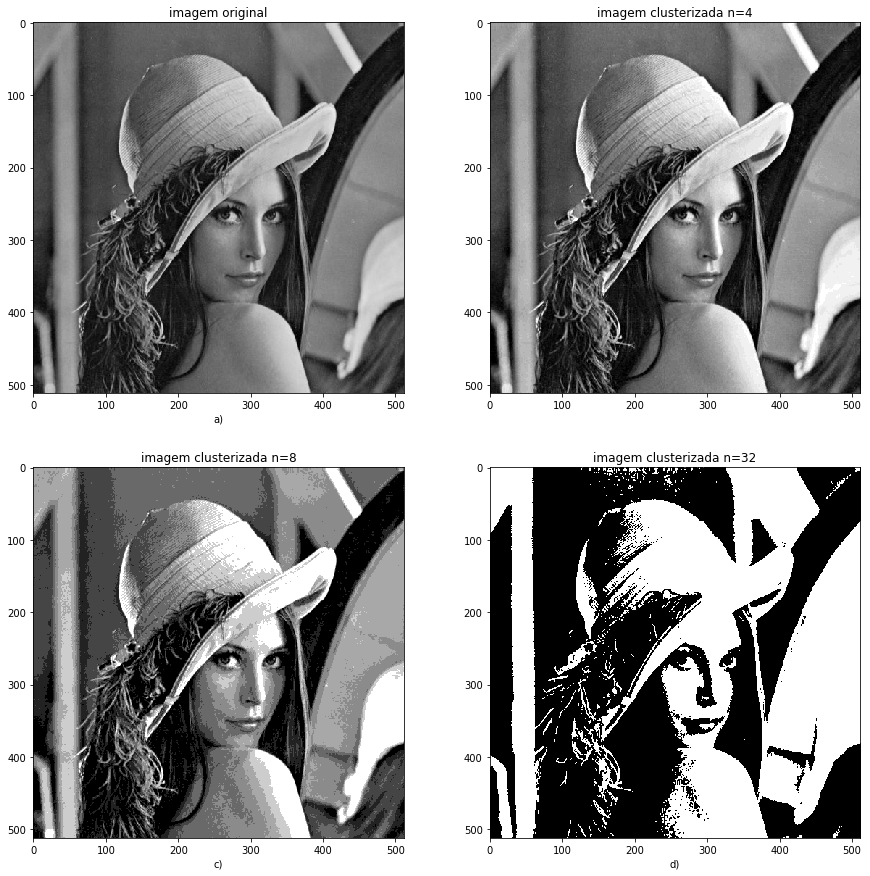

In [85]:
plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title( 'imagem original')
plt.xlabel('a)')
plt.subplot(2,2,2)
plt.title( 'imagem clusterizada n=4')
plt.imshow(cluster_centers[clusters_labels].reshape(512,512),cmap='gray')
plt.xlabel('b)')

kmeans_cluster = cluster.KMeans(n_clusters=8)
kmeans_cluster.fit(img2)
cluster_centers = kmeans_cluster.cluster_centers_
clusters_labels = kmeans_cluster.labels_

plt.subplot(2,2,3)
plt.imshow(cluster_centers[clusters_labels].reshape(512,512),cmap='gray')
plt.title( 'imagem clusterizada n=8')
plt.xlabel('c)')

kmeans_cluster = cluster.KMeans(n_clusters=2)
kmeans_cluster.fit(img2)
cluster_centers = kmeans_cluster.cluster_centers_
clusters_labels = kmeans_cluster.labels_

plt.subplot(2,2,4)
plt.title( 'imagem clusterizada n=32')
plt.imshow(cluster_centers[clusters_labels].reshape(512,512),cmap='gray')
plt.xlabel('d)')